# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import NumPy and Pyplot.

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [69]:
def classical_gram_schmidt(A:np.ndarray) -> (np.ndarray,np.ndarray) : 
    """Returns QR decomposition of matrix A obtained by classic gram schmidt orgthonanlization procedure. 
    Q and R are returned as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.131"""
    A = A.copy()
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for k in range(n):
        q = A[:, k]
        j = 0
        for j in range(k):
            R[j,k] = Q[:,j].T @ A[:, k]
            q = q - R[j,k] * Q[:,j]
        R[k,k] = np.linalg.norm(q)
        if R[k,k] != 0:
            q = q/R[k,k]
            Q[:,k] = q
        else:
            break
    return Q, R

    
def modified_gram_schmidt(A):
    """Returns QR decomposition of matrix A obtained by classic gram schmidt orgthonanlization procedure. 
    Q and R are returned as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.132"""
    A = A.copy()
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for k in range(n):
        R[k,k] = np.linalg.norm(A[:,k])
        if R[k,k] == 0:
            break
        Q[:,k] = A[:, k]/R[k,k]
        # starting at 1, to adhere to condition in Heath
        for j in range(k+1, n):
            R[k,j] = Q[:,k].T @ A[:, j]
            A[:, j] = A[:, j] - R[k,j]*Q[:,k]
    return Q, R




## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



In [70]:
def make_hilbert_matrix(n: int) -> np.ndarray:
    """Returns a Hilbert matrix sized n by n."""
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / ((i + 1) + (j + 1) - 1)
    return H

In [71]:
# Testing
H = make_hilbert_matrix(3)
print(H)

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


In [72]:
# Testing against reference numpy implementation
QR_reference = np.linalg.qr(H)[0]
QR_reference


array([[-0.85714286,  0.50160492,  0.11704115],
       [-0.42857143, -0.56848557, -0.70224688],
       [-0.28571429, -0.65208639,  0.70224688]])

In [73]:
QR_classic = classical_gram_schmidt(H)[0]
QR_classic

array([[ 0.85714286, -0.50160492,  0.11704115],
       [ 0.42857143,  0.56848557, -0.70224688],
       [ 0.28571429,  0.65208639,  0.70224688]])

In [74]:
QR_classic = modified_gram_schmidt(H)[1]
QR_classic

array([[ 0.85714286, -0.50160492,  0.11704115],
       [ 0.42857143,  0.56848557, -0.70224688],
       [ 0.28571429,  0.65208639,  0.70224688]])

Reflecting on the tests, our implementation looks fine. The only difference is the signs, which is acceptable considering a Q obtained from a QR decomposition is unique up until the signs.

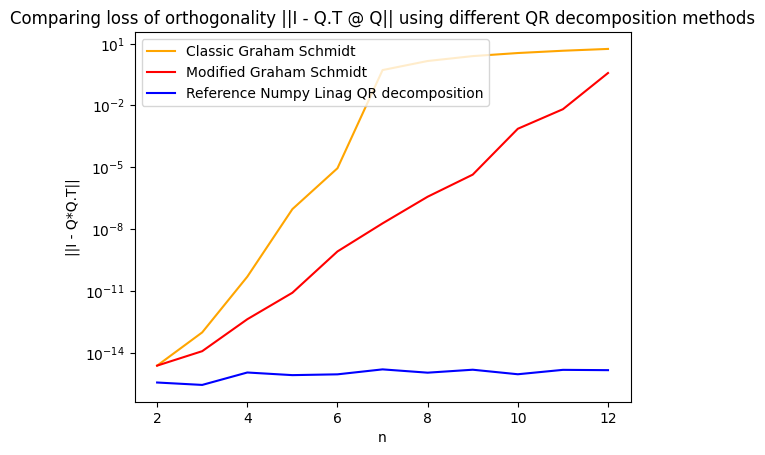

I_minus_Q_Qt_classic: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_modified: [2.368186647638997e-15, 1.19130603637318e-14, 4.220164732810544e-13, 8.129448492641487e-12, 8.213337219931363e-10, 1.8883321207316407e-08, 3.704655786928431e-07, 4.3746673643116425e-06, 0.0007342783123353194, 0.0065219743395960785, 0.37164390391767127]
I_minus_Q_Qt_reference: [3.597533769998862e-16, 2.7476618026966064e-16, 1.1004656964352382e-15, 8.200821523359857e-16, 8.961656023355713e-16, 1.559947614138878e-15, 1.0791513831031437e-15, 1.5011704008320562e-15, 9.04841642562989e-16, 1.4798365649911251e-15, 1.4289562855533472e-15]


In [75]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic = classical_gram_schmidt(H)[0]
    list_of_Q_classic.append(Q_gram_classic)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic]


# creating a list of Q matrices with our modified Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_modified = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_modified = modified_gram_schmidt(H)[0]
    list_of_Q_modified.append(Q_gram_modified)

# Computing ||I - Q.T @ Q|| for Gram Schmidt modified
I_minus_Q_Qt_modified = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_modified]

# creating a list of Q matrices with numpy reference QR decomposition based on Hilberts matrices with increasing n
list_of_Q_reference = [] 
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_reference = np.linalg.qr(H)[0]
    list_of_Q_reference.append(Q_gram_reference)

# Computing ||I - Q.T @ Q|| for reference numpy implementation
I_minus_Q_Qt_reference = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_reference]

# Plotting results
plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| using different QR decomposition methods')
plt.plot(n_range,I_minus_Q_Qt_classic, c = 'orange', label = 'Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_modified, c = 'red', label = 'Modified Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_reference, c = 'blue', label = 'Reference Numpy Linag QR decomposition')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic:',I_minus_Q_Qt_classic)
print('I_minus_Q_Qt_modified:', I_minus_Q_Qt_modified)
print('I_minus_Q_Qt_reference:', I_minus_Q_Qt_reference)


The observed loss of orthogonality is tiny for each method used.

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


In [76]:
# Do NOT delete YET

# n_range = range(2,13)

# # creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
# list_of_Q_classic_1 = []
# for n in n_range:
#     H = make_hilbert_matrix(n)
#     Q_gram_classic_1 = classical_gram_schmidt(H)[0]
#     list_of_Q_classic_1.append(Q_gram_classic_1)

# # Computing ||I - Q.T @ Q|| for Gram Schmidt classic
# I_minus_Q_Qt_classic_1 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_1]

# # creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
# list_of_Q_classic_2 = []
# for n in n_range:
#     H = make_hilbert_matrix(n)
#     Q_gram_classic_2 = classical_gram_schmidt(H)[0]
#     list_of_Q_classic_2.append(Q_gram_classic_2)

# # Computing ||I - Q.T @ Q|| for Gram Schmidt classic
# I_minus_Q_Qt_classic_2 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_2]

# plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| for 2 tries of Classic Graham Schmidt')
# plt.plot(n_range,I_minus_Q_Qt_classic_1, c = 'green', label = 'Classic Graham Schmidt try 1')
# plt.plot(n_range,I_minus_Q_Qt_classic_2, c = 'purple', label = 'Classic Graham Schmidt try 2')
# plt.ylabel('||I - Q*Q.T||')
# plt.xlabel('n')
# plt.yscale('log')
# plt.legend()
# plt.show()

# print('I_minus_Q_Qt_classic_1:', I_minus_Q_Qt_classic_1)
# print('I_minus_Q_Qt_classic_2:', I_minus_Q_Qt_classic_2)


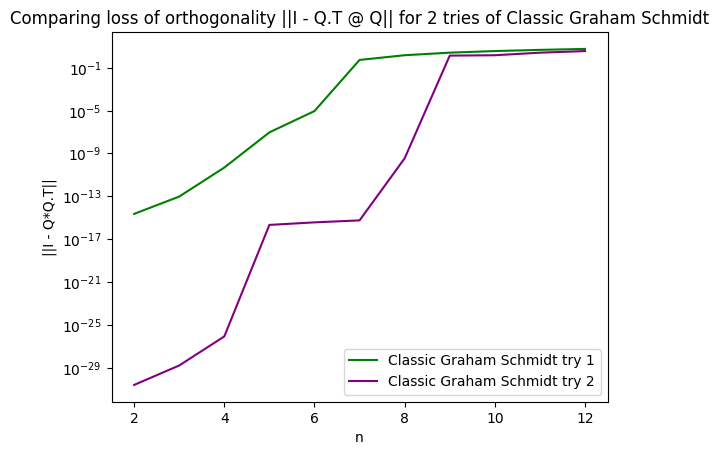

I_minus_Q_Qt_classic_1: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_classic_2: [2.789044477473679e-31, 1.7989029143884645e-29, 9.140263114127041e-27, 2.220446049250321e-16, 3.845925373438756e-16, 5.874754449697598e-16, 3.541775006495208e-10, 1.3018166018781856, 1.4142135621307204, 2.4461087783381315, 3.4641012612115065]


In [77]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_1 = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic_1 = classical_gram_schmidt(H)[0]
    list_of_Q_classic_1.append(Q_gram_classic_1)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_1 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_1]

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_2 = []
for n in n_range:
    Qt_Q = list_of_Q_classic_1[n-2].T @ list_of_Q_classic_1[n-2]
    Q_gram_classic_2 = classical_gram_schmidt(Qt_Q)[0]
    list_of_Q_classic_2.append(Q_gram_classic_2)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_2 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_2]

plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| for 2 tries of Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_classic_1, c = 'green', label = 'Classic Graham Schmidt try 1')
plt.plot(n_range,I_minus_Q_Qt_classic_2, c = 'purple', label = 'Classic Graham Schmidt try 2')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic_1:', I_minus_Q_Qt_classic_1)
print('I_minus_Q_Qt_classic_2:', I_minus_Q_Qt_classic_2)

We can see for low values of n, applying the gram Schmidt procedure again on the product of tha matrices Q.T @ Q (where Q is the the output of the first Gram Schmidt output series) results in lower Orthogonality loss. This reduction in orthogonality loss reduces as n increases, so applying the procedure twice loses its benefit (for the given ranges of n and inputs). 

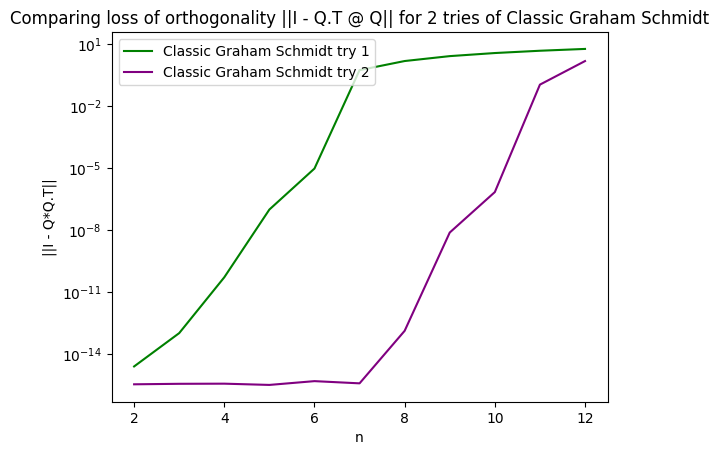

I_minus_Q_Qt_classic_1: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_classic_2: [3.236828524569469e-16, 3.4219371797089426e-16, 3.472221400179444e-16, 3.021408270392384e-16, 4.60796892750692e-16, 3.6018808403219723e-16, 1.2540090424564655e-13, 7.145380658622118e-09, 6.480295313376455e-07, 0.10251662911201843, 1.4152936653156225]


In [78]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_1 = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic_1 = classical_gram_schmidt(H)[0]
    list_of_Q_classic_1.append(Q_gram_classic_1)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_1 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_1]

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_2 = []
for n in n_range:
    Q_classic_GS_applied_once = list_of_Q_classic_1[n-2]
    Q_gram_classic_2 = classical_gram_schmidt(Q_classic_GS_applied_once)[0]
    list_of_Q_classic_2.append(Q_gram_classic_2)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_2 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_2]

plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| for 2 tries of Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_classic_1, c = 'green', label = 'Classic Graham Schmidt try 1')
plt.plot(n_range,I_minus_Q_Qt_classic_2, c = 'purple', label = 'Classic Graham Schmidt try 2')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic_1:', I_minus_Q_Qt_classic_1)
print('I_minus_Q_Qt_classic_2:', I_minus_Q_Qt_classic_2)

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [105]:
def householder_qr(A):
    """"Householder QR decomposition."""
    A = A.copy()
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    minimum = min(m-1,n)

    for k in range(minimum):
        alpha_k = -np.sign(A[k,k]) * np.linalg.norm(A[k:,k])
        e_k = np.zeros(m-k)
        e_k[0] = alpha_k
        # print(e_k)
        # print(e_k.shape)
        v_k = A[k:,k] - e_k
        beta_k = v_k.T @ v_k

        if beta_k == 0:
            continue
        for j in range(k,n):
            if j == k:
                # print('v_k.shape', v_k.shape)
                # print('A[k:,j].shape', A[k:,j].shape)
                # print('v_k.T',  v_k.T.shape)
                gamma_j = v_k.T @ A[k:,j]
                A[k:,j] = A[k:,j] - (2 * gamma_j/beta_k) * v_k
                Q[k:,j] = Q[k:,j] - (2 * gamma_j/beta_k) * v_k
    R = A
    return Q, R



In [112]:
H = make_hilbert_matrix(3)

In [113]:

householder_qr(H)[0]

array([[-1.16666667,  0.5       ,  0.33333333],
       [ 0.        , -0.41666667,  0.25      ],
       [ 0.        ,  0.        ,  0.2       ]])

In [115]:
modified_gram_schmidt(H)[0]

array([[ 0.85714286, -0.50160492,  0.11704115],
       [ 0.42857143,  0.56848557, -0.70224688],
       [ 0.28571429,  0.65208639,  0.70224688]])

## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


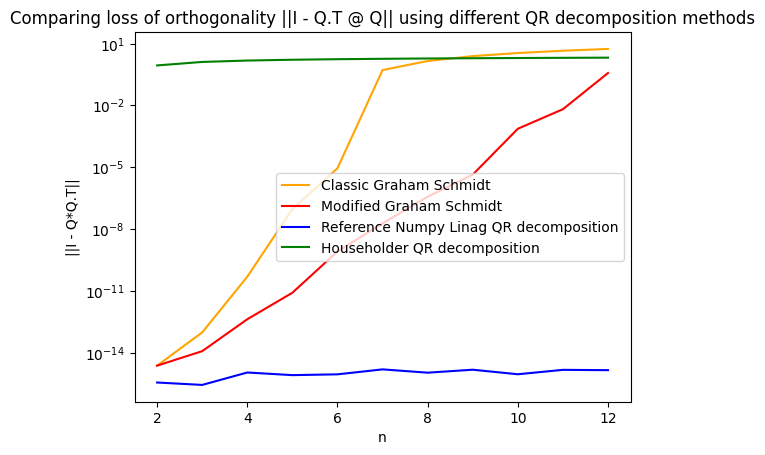

I_minus_Q_Qt_classic: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_modified: [2.368186647638997e-15, 1.19130603637318e-14, 4.220164732810544e-13, 8.129448492641487e-12, 8.213337219931363e-10, 1.8883321207316407e-08, 3.704655786928431e-07, 4.3746673643116425e-06, 0.0007342783123353194, 0.0065219743395960785, 0.37164390391767127]
I_minus_Q_Qt_reference: [3.597533769998862e-16, 2.7476618026966064e-16, 1.1004656964352382e-15, 8.200821523359857e-16, 8.961656023355713e-16, 1.559947614138878e-15, 1.0791513831031437e-15, 1.5011704008320562e-15, 9.04841642562989e-16, 1.4798365649911251e-15, 1.4289562855533472e-15]


In [98]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic = classical_gram_schmidt(H)[0]
    list_of_Q_classic.append(Q_gram_classic)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic]


# creating a list of Q matrices with our modified Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_modified = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_modified = modified_gram_schmidt(H)[0]
    list_of_Q_modified.append(Q_gram_modified)

# Computing ||I - Q.T @ Q|| for Gram Schmidt modified
I_minus_Q_Qt_modified = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_modified]

# creating a list of Q matrices with numpy reference QR decomposition based on Hilberts matrices with increasing n
list_of_Q_reference = [] 
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_reference = np.linalg.qr(H)[0]
    list_of_Q_reference.append(Q_gram_reference)

# Computing ||I - Q.T @ Q|| for reference numpy implementation
I_minus_Q_Qt_reference = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_reference]


list_of_q_householder = [] 
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_householder = householder_qr(H)[0]
    list_of_q_householder.append(Q_householder)

# Computing ||I - Q.T @ Q|| for reference numpy implementation
I_minus_Q_Qt_householder = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_q_householder]

# Plotting results
plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| using different QR decomposition methods')
plt.plot(n_range,I_minus_Q_Qt_classic, c = 'orange', label = 'Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_modified, c = 'red', label = 'Modified Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_reference, c = 'blue', label = 'Reference Numpy Linag QR decomposition')
plt.plot(n_range,I_minus_Q_Qt_householder, c = 'green', label = 'Householder QR decomposition')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic:',I_minus_Q_Qt_classic)
print('I_minus_Q_Qt_modified:', I_minus_Q_Qt_modified)
print('I_minus_Q_Qt_reference:', I_minus_Q_Qt_reference)


